In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram

In [22]:
#Load data.
df = pd.read_csv('Data/Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [23]:
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']].values

In [24]:
#Sstandardize for clustering 
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [25]:
inertias = []
sil_scores = []
ks = range(2, 8)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_s)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_s, labels))

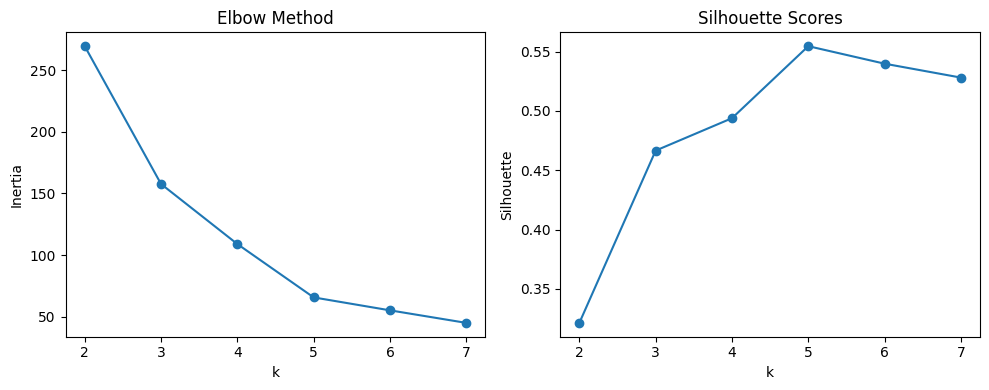

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ks, inertias, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')
plt.subplot(1,2,2)
plt.plot(ks, sil_scores, '-o')
plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

In [27]:
# ---------- Fit KMeans (choose K from above; typical answer = 5) ----------

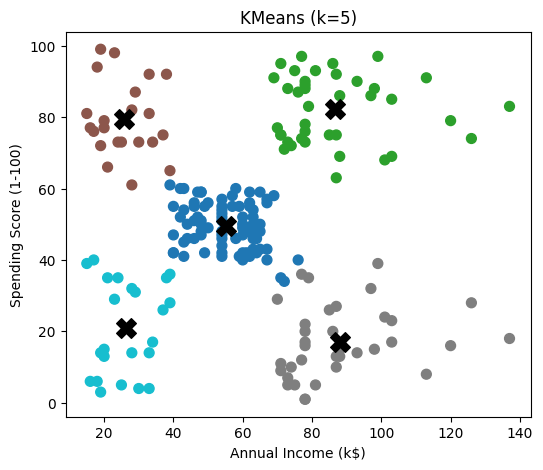

In [28]:
k = 5
km = KMeans(n_clusters=k,random_state=42,n_init=20)
km_labels =km.fit_predict(X_s)
# plot cluster (back to original scale for interpretation)
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=km_labels, cmap='tab10', s=50)
centers = scaler.inverse_transform(km.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X')
plt.xlabel('Annual Income (k$)'); plt.ylabel('Spending Score (1-100)')
plt.title(f'KMeans (k={k})')
plt.show()

In [29]:
# Cluster profiling
df['cluster_km'] = km_labels
print("KMeans cluster sizes:\n", df['cluster_km'].value_counts())
print("Cluster means:\n", df.groupby('cluster_km')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())

KMeans cluster sizes:
 cluster_km
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
Cluster means:
                   Age  Annual Income (k$)  Spending Score (1-100)
cluster_km                                                       
0           42.716049           55.296296               49.518519
1           32.692308           86.538462               82.128205
2           25.272727           25.727273               79.363636
3           41.114286           88.200000               17.114286
4           45.217391           26.304348               20.913043


In [30]:
# ---------- Agglomerative Clustering ----------
# Dendrogram (hierarchy) using linkage (Ward)

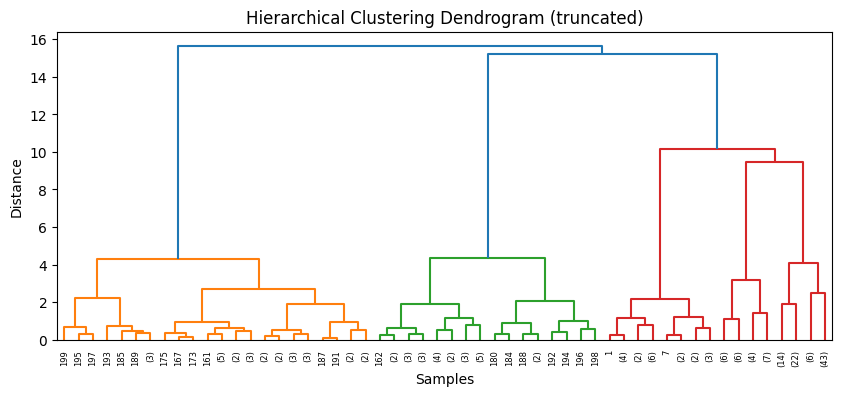

Agg cluster sizes:
 cluster_agg
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64
Contingency table (KMeans vs Agglomerative):
 cluster_agg   0   1   2   3   4
cluster_km                     
0             0   0  81   0   0
1             0  39   0   0   0
2             0   0   1  21   0
3            32   0   3   0   0
4             0   0   0   0  23


In [31]:
linked = linkage(X_s, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Samples'); plt.ylabel('Distance')
plt.show()

# Fit Agglomerative with same number of clusters
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
agg_labels = agg.fit_predict(X_s)
df['cluster_agg'] = agg_labels
print("Agg cluster sizes:\n", df['cluster_agg'].value_counts())

# Compare KMeans vs Agglomerative (just a quick check)
ct = pd.crosstab(df['cluster_km'], df['cluster_agg'])
print("Contingency table (KMeans vs Agglomerative):\n", ct)